In [1]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

In [2]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')

In [3]:
taxi_zones=pd.read_csv('taxi_zone_lookup.csv',encoding='latin1')

In [4]:
#We assume that we will take in consideration the year 2018. so june is referred as june 2018.
#We are going to plot the graph that, for each day of the month, plot the weighted mean hour for each.
#this because we started from a single month. First, we took in consideration to create a dictionary with,   
#for each day, has a list of tuples that corresponds to all the trips in the hour of that day.
#and then, we created the dict() with the day of the month and the corresponding hour's mean.

In [5]:
junedates = yellow_2018_06['tpep_pickup_datetime']

In [20]:
###########Dictionary that, for each day of the month, saves the list of all time slots and the related number of trips### 
days_hours=dict()
for el in junedates:
    el=el.split(' ')
    time=el[1]
    hour=time[:2]
    date=el[0]
    day=date[-2:]
    if day not in days_hours.keys():
        days_hours[day]=[[hour, 1]]
    else:
        updated=False
        for l in days_hours[day]:
            if l[0]==hour:
            #we update the occurrence for that hour with another trip
                l[1]+=1
                updated=True
            else:
                continue
        if updated==False:
            days_hours[day].append([hour, 1])



In [21]:
days_hours

{'01': [['00', 10113],
  ['01', 6226],
  ['23', 18021],
  ['02', 3859],
  ['03', 2542],
  ['04', 2383],
  ['05', 3579],
  ['06', 8287],
  ['07', 14473],
  ['08', 17185],
  ['09', 15739],
  ['10', 14254],
  ['11', 14536],
  ['12', 15427],
  ['13', 15527],
  ['14', 16890],
  ['15', 15933],
  ['17', 17485],
  ['16', 14559],
  ['18', 20385],
  ['19', 19578],
  ['20', 17088],
  ['21', 17798],
  ['22', 18768]],
 '31': [['23', 248],
  ['21', 8],
  ['22', 13],
  ['18', 5],
  ['19', 4],
  ['14', 2],
  ['15', 2],
  ['06', 4],
  ['13', 3],
  ['17', 1],
  ['07', 1],
  ['05', 1],
  ['09', 1],
  ['12', 1]],
 '02': [['00', 16604],
  ['01', 11606],
  ['16', 15302],
  ['17', 16518],
  ['18', 17670],
  ['19', 17538],
  ['03', 6776],
  ['20', 14118],
  ['21', 15456],
  ['22', 17352],
  ['23', 17305],
  ['02', 9211],
  ['04', 4511],
  ['05', 2474],
  ['08', 8164],
  ['06', 3419],
  ['07', 5657],
  ['09', 11610],
  ['10', 13883],
  ['11', 15582],
  ['12', 17200],
  ['13', 17532],
  ['14', 16489],
  ['15', 

In [22]:
#now we will compute the weighted mean hour for each day, putting all in a dictionary with key = day and value = mean
means_dict=dict()
for key in days_hours.keys():
    product_sum=0
    denominator_sum=0
    day_list=days_hours[key]
    for el in day_list:
        product_sum+=int(el[0])*el[1]
        denominator_sum+=el[1]
    means_dict[key]=product_sum/denominator_sum

In [23]:
means_dict

{'01': 13.897500272895972,
 '31': 22.091836734693878,
 '02': 13.281562401709484,
 '23': 12.934301635151183,
 '03': 12.686405724540423,
 '04': 14.039834333845223,
 '05': 14.253394332939788,
 '06': 14.268591215230654,
 '07': 14.192585563833486,
 '08': 13.875630023157608,
 '28': 14.099991083134906,
 '19': 14.20386219371263,
 '10': 12.54688838881726,
 '09': 13.225426190970296,
 '30': 13.127504533674001,
 '21': 13.907366425303644,
 '11': 14.137749019720495,
 '14': 14.197295134594887,
 '26': 14.273993112741428,
 '17': 12.965624369578373,
 '29': 13.578653259993693,
 '22': 13.736722260226678,
 '12': 14.348068075252472,
 '24': 12.375303030924536,
 '13': 14.132400024308254,
 '25': 13.842233761773391,
 '15': 13.595259802686892,
 '16': 13.209978177494545,
 '27': 14.244549693037369,
 '18': 14.157324087264511,
 '20': 14.148055761260734}

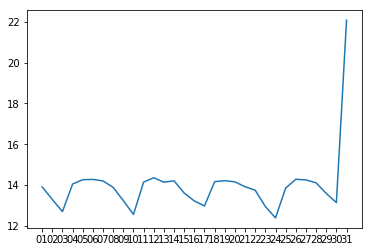

In [28]:
plt.plot(*zip(*sorted(means_dict.items())))
plt.show()

In [27]:
#we can compute something similar for each borough:

In [29]:
yellow_tz_2018_06 = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [ ]:
#del taxi_zones
#del yellow_tz_2018_06

In [7]:
#del yellow_2018_06


NameError: name 'yellow_2018_06' is not defined